In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
from scipy import stats
from math import sqrt
def annot_plot(ax,w,h):                                    # function to add text to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

In [2]:
df=pd.read_csv("R:/notes/Datasets/matches.csv")
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
print("Number of rows = ",len(df))
print("Number of columns = ",len(df.columns))

Number of rows =  756
Number of columns =  18


In [4]:
L=[]
for i in df.columns:
    L.append(i)
print(L)

['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3']


In [5]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 106.4+ KB


In [7]:
df.sort_values("season",ascending=True,inplace=True)
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
116,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen,NaN
82,83,2008,Jaipur,2008-05-04,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,normal,0,Rajasthan Royals,0,8,Sohail Tanvir,Sawai Mansingh Stadium,Asad Rauf,AV Jayaprakash,NaN
81,82,2008,Mumbai,2008-05-04,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,29,0,SM Pollock,Dr DY Patil Sports Academy,IL Howell,RE Koertzen,NaN
80,81,2008,Chandigarh,2008-05-03,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kings XI Punjab,9,0,IK Pathan,"Punjab Cricket Association Stadium, Mohali",DJ Harper,I Shivram,NaN
79,80,2008,Hyderabad,2008-05-25,Deccan Chargers,Royal Challengers Bangalore,Deccan Chargers,bat,normal,0,Royal Challengers Bangalore,0,5,R Vinay Kumar,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,RE Koertzen,NaN


In [8]:
df.reset_index(inplace=True)
df.head()

,index,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,116,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen,NaN
1,82,83,2008,Jaipur,2008-05-04,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,normal,0,Rajasthan Royals,0,8,Sohail Tanvir,Sawai Mansingh Stadium,Asad Rauf,AV Jayaprakash,NaN
2,81,82,2008,Mumbai,2008-05-04,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,29,0,SM Pollock,Dr DY Patil Sports Academy,IL Howell,RE Koertzen,NaN
3,80,81,2008,Chandigarh,2008-05-03,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kings XI Punjab,9,0,IK Pathan,"Punjab Cricket Association Stadium, Mohali",DJ Harper,I Shivram,NaN
4,79,80,2008,Hyderabad,2008-05-25,Deccan Chargers,Royal Challengers Bangalore,Deccan Chargers,bat,normal,0,Royal Challengers Bangalore,0,5,R Vinay Kumar,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,RE Koertzen,NaN


In [9]:
df.tail()

,index,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,721,11317,2019,Kolkata,12/04/19,Kolkata Knight Riders,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,7,S Dhawan,Eden Gardens,Yeshwant Barde,O Nandan,Rod Tucker
752,722,11318,2019,Mumbai,13/04/19,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,4,JC Buttler,Wankhede Stadium,Nitin Menon,Nanda Kishore,Marais Erasmus
753,723,11319,2019,Mohali,13/04/19,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,8,AB de Villiers,IS Bindra Stadium,S Ravi,Ulhas Gandhe,Nigel Llong
754,725,11321,2019,Hyderabad,14/04/19,Delhi Capitals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Delhi Capitals,39,0,K Paul,Rajiv Gandhi Intl. Cricket Stadium,Anil Chaudhary,Bruce Oxenford,Chris Gaffaney
755,755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [10]:
new_df=df.drop(columns=['index'])
new_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen,NaN
1,83,2008,Jaipur,2008-05-04,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,normal,0,Rajasthan Royals,0,8,Sohail Tanvir,Sawai Mansingh Stadium,Asad Rauf,AV Jayaprakash,NaN
2,82,2008,Mumbai,2008-05-04,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,29,0,SM Pollock,Dr DY Patil Sports Academy,IL Howell,RE Koertzen,NaN
3,81,2008,Chandigarh,2008-05-03,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kings XI Punjab,9,0,IK Pathan,"Punjab Cricket Association Stadium, Mohali",DJ Harper,I Shivram,NaN
4,80,2008,Hyderabad,2008-05-25,Deccan Chargers,Royal Challengers Bangalore,Deccan Chargers,bat,normal,0,Royal Challengers Bangalore,0,5,R Vinay Kumar,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,RE Koertzen,NaN


In [11]:
#new_df.style.set_properties(**{'text-align': 'right'})

In [12]:
new_df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [13]:
new_df.drop(['umpire3'], axis = 1, inplace = True)
new_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen
1,83,2008,Jaipur,2008-05-04,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,normal,0,Rajasthan Royals,0,8,Sohail Tanvir,Sawai Mansingh Stadium,Asad Rauf,AV Jayaprakash
2,82,2008,Mumbai,2008-05-04,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,29,0,SM Pollock,Dr DY Patil Sports Academy,IL Howell,RE Koertzen
3,81,2008,Chandigarh,2008-05-03,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kings XI Punjab,9,0,IK Pathan,"Punjab Cricket Association Stadium, Mohali",DJ Harper,I Shivram
4,80,2008,Hyderabad,2008-05-25,Deccan Chargers,Royal Challengers Bangalore,Deccan Chargers,bat,normal,0,Royal Challengers Bangalore,0,5,R Vinay Kumar,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,RE Koertzen


In [14]:
new_df['winner'].unique()

array(['Rajasthan Royals', 'Mumbai Indians', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Chennai Super Kings', 'Deccan Chargers', 'Kolkata Knight Riders',
       'Kochi Tuskers Kerala', 'Pune Warriors', nan,
       'Sunrisers Hyderabad', 'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [15]:
new_df.replace('Rising Pune Supergiant','Rising Pune Supergiants', inplace = True)
new_df['winner'].unique()

array(['Rajasthan Royals', 'Mumbai Indians', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Chennai Super Kings', 'Deccan Chargers', 'Kolkata Knight Riders',
       'Kochi Tuskers Kerala', 'Pune Warriors', nan,
       'Sunrisers Hyderabad', 'Gujarat Lions', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [16]:
new_df['city'].unique()

array(['Mumbai', 'Jaipur', 'Chandigarh', 'Hyderabad', 'Chennai', 'Delhi',
       'Kolkata', 'Bangalore', 'Centurion', 'East London', 'Kimberley',
       'Port Elizabeth', 'Johannesburg', 'Durban', 'Bloemfontein',
       'Cape Town', 'Ahmedabad', 'Cuttack', 'Dharamsala', 'Nagpur',
       'Kochi', 'Indore', 'Pune', 'Visakhapatnam', 'Raipur', 'Ranchi',
       nan, 'Abu Dhabi', 'Sharjah', 'Rajkot', 'Kanpur', 'Bengaluru',
       'Mohali'], dtype=object)

In [17]:
new_df.replace('Bangalore','Bengaluru', inplace = True)
new_df['city'].unique()

array(['Mumbai', 'Jaipur', 'Chandigarh', 'Hyderabad', 'Chennai', 'Delhi',
       'Kolkata', 'Bengaluru', 'Centurion', 'East London', 'Kimberley',
       'Port Elizabeth', 'Johannesburg', 'Durban', 'Bloemfontein',
       'Cape Town', 'Ahmedabad', 'Cuttack', 'Dharamsala', 'Nagpur',
       'Kochi', 'Indore', 'Pune', 'Visakhapatnam', 'Raipur', 'Ranchi',
       nan, 'Abu Dhabi', 'Sharjah', 'Rajkot', 'Kanpur', 'Mohali'],
      dtype=object)

In [18]:
#list(new_df.venue.unique())

In [19]:
#L=list(new_df.city.isnull())


In [20]:
#new_df.isnull().sum()

In [21]:
new_df.isnull().sum().sum()

19

In [22]:
#Found where null value are there
l=new_df[new_df['winner'].isnull()].index.tolist()
print(l)

[216, 471, 493, 712]


In [23]:
new_df.loc[l]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
216,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
471,546,2015,Bengaluru,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
493,571,2015,Bengaluru,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan
712,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe


In [24]:
new_df['winner'] = new_df['winner'].replace(np.nan,'Not possible')
new_df.loc[l]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
216,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,Not possible,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
471,546,2015,Bengaluru,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,Not possible,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
493,571,2015,Bengaluru,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,Not possible,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan
712,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,Not possible,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe


In [25]:
new_df['player_of_match'] = new_df['player_of_match'].replace(np.nan,'Not possible')
new_df.loc[l]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
216,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,Not possible,0,0,Not possible,Feroz Shah Kotla,SS Hazare,RJ Tucker
471,546,2015,Bengaluru,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,Not possible,0,0,Not possible,M Chinnaswamy Stadium,JD Cloete,PG Pathak
493,571,2015,Bengaluru,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,Not possible,0,0,Not possible,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan
712,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,Not possible,0,0,Not possible,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe


In [26]:
r=new_df[new_df['city'].isnull()].index.tolist()
print(r)

[400, 407, 410, 414, 416, 420, 421]


In [27]:
new_df.loc[r]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
400,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
407,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus
410,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
414,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
416,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
420,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
421,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary


In [28]:
m=new_df[new_df['umpire1'].isnull()].index.tolist()
print(m)

[601, 721]


In [29]:
new_df.loc[m]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
601,5,2017,Bengaluru,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
721,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN


In [30]:
new_df['umpire1'].fillna(method='ffill', inplace=True)
#new_df['umpire1'].fillna('unknown', inplace = True)
new_df.loc[[600,601,720,721]]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
600,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
601,5,2017,Bengaluru,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,A Deshmukh,NaN
720,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
721,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,Nigel Llong,NaN


In [31]:
new_df['umpire2'].fillna(method='bfill', inplace = True)
new_df.loc[[601,602,721,722]]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
601,5,2017,Bengaluru,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,A Deshmukh,C Shamshuddin
602,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
721,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,Nigel Llong,Vineet Kulkarni
722,11323,2019,Mohali,16/04/19,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kings XI Punjab,12,0,R Ashwin,IS Bindra Stadium,Anil Chaudhary,Vineet Kulkarni


In [32]:
d=new_df[new_df['city'].isnull()].index.tolist()
print(d)

[400, 407, 410, 414, 416, 420, 421]


In [33]:
new_df.loc[d]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
400,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
407,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus
410,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
414,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
416,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
420,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
421,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary


In [34]:
#new_df.city.replace(np.nan,new_df.winner,inplace=True)

In [35]:
new_df['city'].fillna('Dubai',inplace=True)

In [36]:
new_df.loc[d]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
400,475,2014,Dubai,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
407,477,2014,Dubai,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus
410,470,2014,Dubai,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
414,469,2014,Dubai,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
416,467,2014,Dubai,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
420,463,2014,Dubai,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
421,462,2014,Dubai,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary


In [37]:
new_df.isnull().sum().sum()

0

In [38]:
#DATA VISUALIZATION

In [39]:
matches_played=pd.concat([new_df['team1'],new_df['team2']])
matches_played=matches_played.value_counts().reset_index()
matches_played.columns=['Team','Total Matches']
matches_played['wins']=new_df['winner'].value_counts().reset_index()['winner']
matches_played

,Team,Total Matches,wins
0,Mumbai Indians,187,109
1,Royal Challengers Bangalore,180,100
2,Kolkata Knight Riders,178,92
3,Kings XI Punjab,176,84
4,Chennai Super Kings,164,82
5,Delhi Daredevils,161,75
6,Rajasthan Royals,147,67
7,Sunrisers Hyderabad,108,58
8,Deccan Chargers,75,29
9,Pune Warriors,46,15


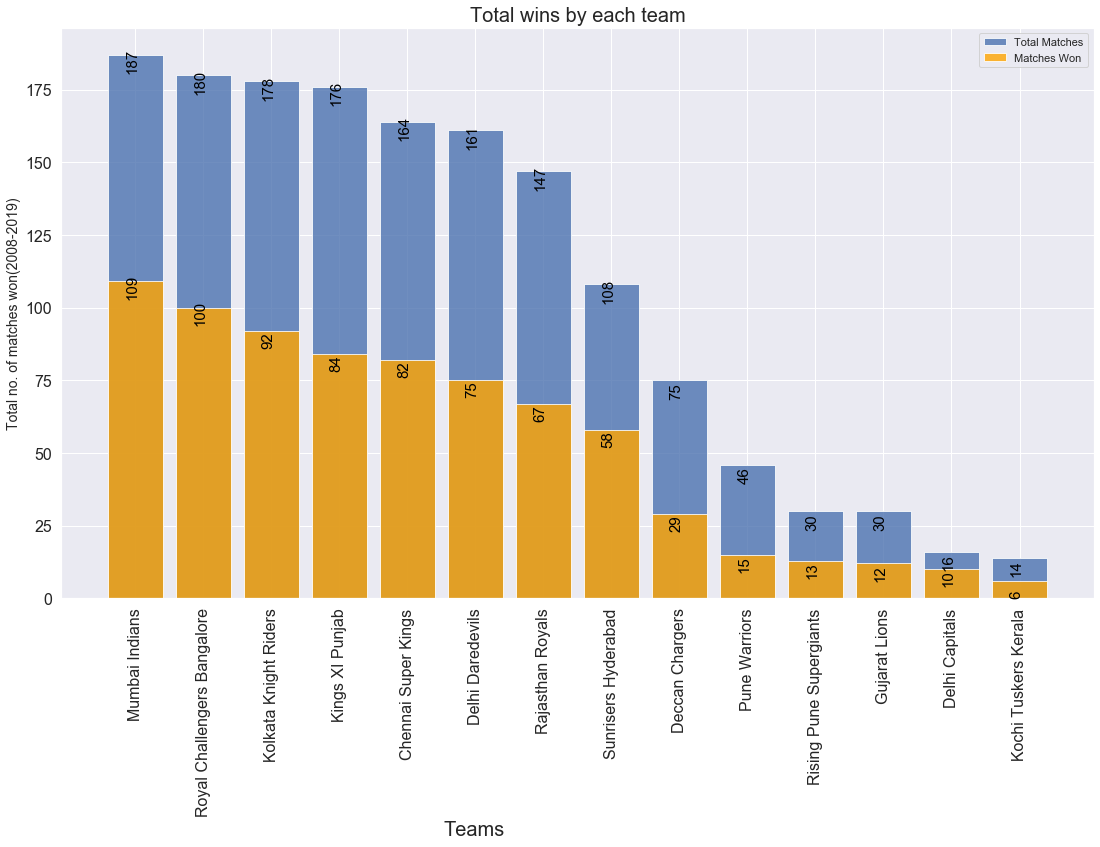

In [40]:
#Total number of matches by each team and total matches won by each team
sns.set(style='darkgrid')

fig=plt.gcf()
fig.set_size_inches(18.5,10.5)

plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=16)
plt.bar(matches_played['Team'],matches_played['Total Matches'],alpha=0.8)
plt.bar(matches_played['Team'],matches_played['wins'],color="orange",alpha=0.8)
count=0
for i in matches_played['wins']:
    plt.text(count-0.15,i-5,str(i),size=15,color='black',rotation=90)
    count+=1
count2=0
for i in matches_played['Total Matches']:
    plt.text(count2-0.15,i-5.5,str(i),size=15,color='black',rotation=90)
    count2+=1
plt.title('Total wins by each team',fontsize=20,x=0.5)
plt.xlabel('Teams',fontsize=20,x=0.4)
plt.ylabel('Total no. of matches won(2008-2019)',fontsize=14)
plt.legend(['Total Matches','Matches Won'])
plt.show()
#Mumbai Indians has won most number of matches.

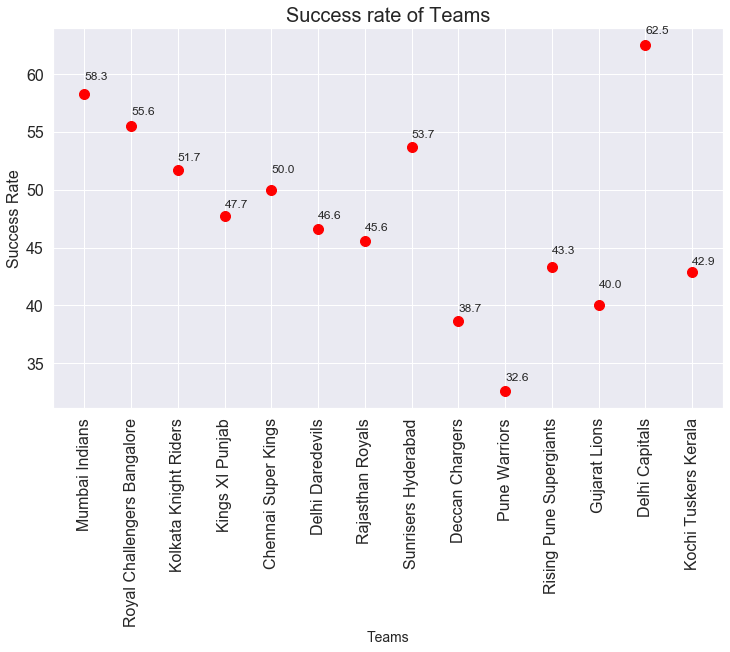

In [41]:
#Success rate of each team in Ipl from 2008-2019
plt.figure(figsize=(12,7))
x=matches_played['wins']
y=matches_played['Total Matches']
z=matches_played['Team']
percentage=(x/y)*100
plt.scatter(z,percentage,s=100,color='red')
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Teams",fontsize=14)
plt.ylabel("Success Rate",fontsize=16)
plt.title("Success rate of Teams",fontsize=20)
count=0
for i in percentage:
    plt.text(count,int(i)+1.5,str(round(i,1)))
    count+=1
plt.show()
#success rate of mumbai indians and Chennai super kings is more than most of the teams but the number of matches 
#played by Delhi capitals are few so the their Success rate is high.

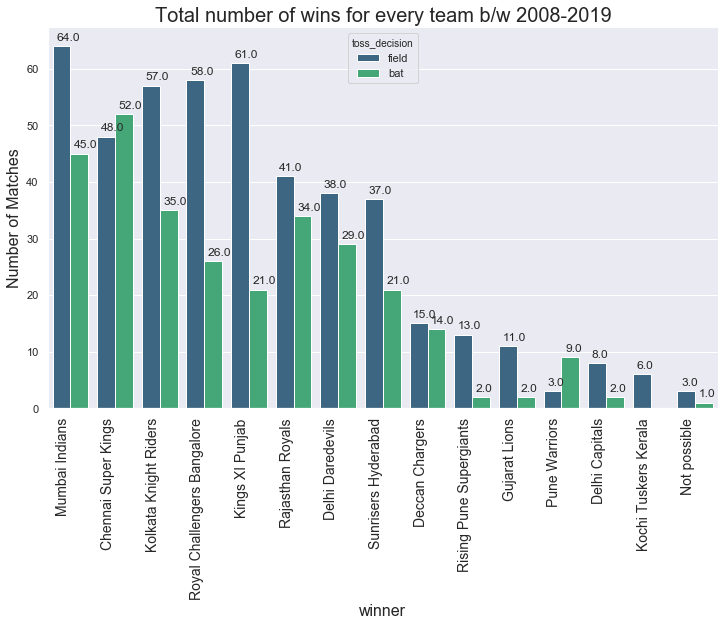

In [42]:
#does toss winning affects the match winner?
plt.figure(figsize=(12,7))
ax = sns.countplot("winner", data = new_df, hue = 'toss_decision',order = new_df['winner'].value_counts().index,palette='viridis')
plt.title("Total number of wins for every team b/w 2008-2019",fontsize=20)
plt.xticks(rotation=90, ha = 'right',fontsize=14)
plt.ylabel('Number of Matches',fontsize=16)
plt.xlabel('winner',fontsize=16)
annot_plot(ax,0.08,1)
plt.show()
#Mumabi Indians,Kolkata Knight riders and Kings XI Punjab has more number of wins if they choose to fiels first.

In [43]:
max_times_winner = new_df.groupby('season')['winner'].value_counts()
groups = max_times_winner.groupby('season')
max_times_winner=max_times_winner.head(102)
max_times_winner

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
        Kolkata Knight Riders           6
        Royal Challengers Bangalore     4
        Deccan Chargers                 2
2009    Delhi Daredevils               10
        Deccan Chargers                 9
        Royal Challengers Bangalore     9
        Chennai Super Kings             8
        Kings XI Punjab                 7
        Rajasthan Royals                6
        Mumbai Indians                  5
        Kolkata Knight Riders           3
2010    Mumbai Indians                 11
        Chennai Super Kings             9
        Deccan Chargers                 8
        Royal Challengers Bangalore     8
        Delhi Daredevils                7
        Kolkata Knight Riders           7
        Rajasthan Royals                

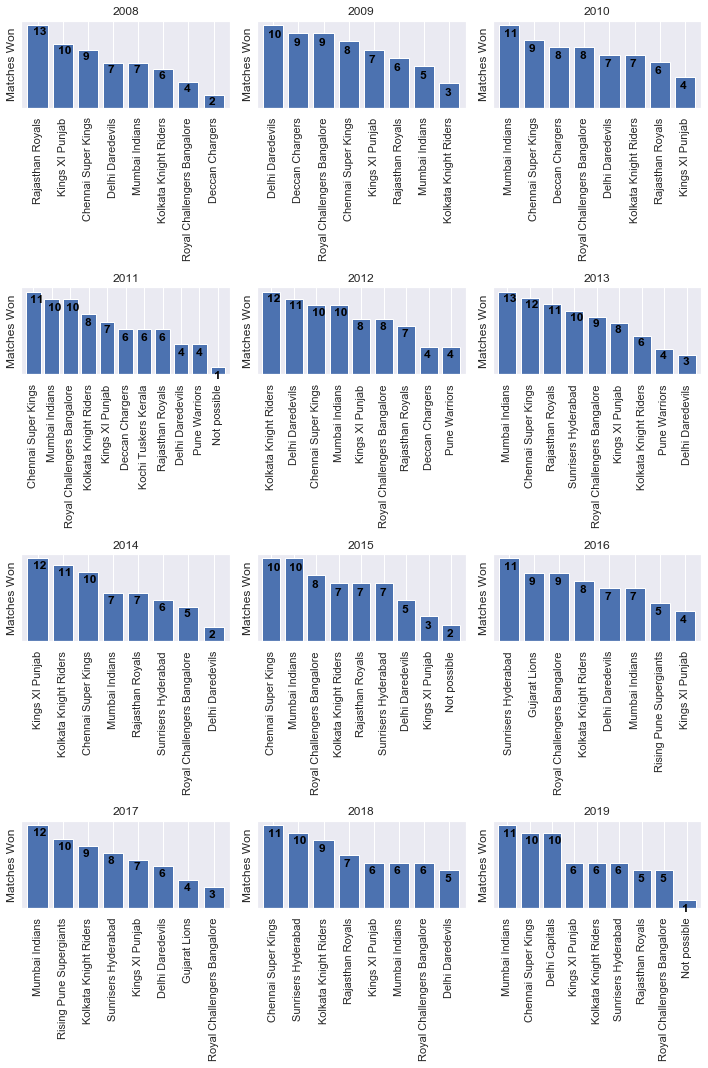

In [44]:
#Number of matches won by each team at each season
fig = plt.figure()
count = 1

for year, group in groups:
    ax = fig.add_subplot(4,3,count)
    ax.set_title(year)
    ax = group[year].plot.bar(figsize = (10,15), width = 0.8)
    
    count+=1;
    
    plt.xlabel('')
    plt.yticks([])
    plt.ylabel('Matches Won')
    
    total_of_matches = []
    for i in ax.patches:
        total_of_matches.append(i.get_height())
    total = sum(total_of_matches)
    
    for i in ax.patches:
        ax.text(i.get_x()+0.2, i.get_height()-1.5,s= i.get_height(),color="black",fontweight='bold')
plt.tight_layout()
plt.show()

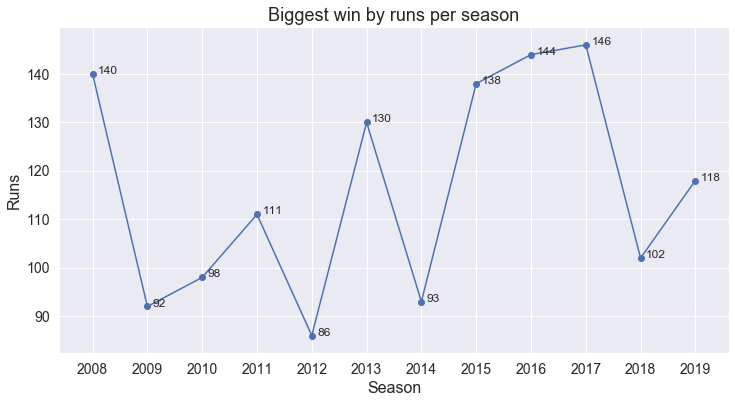

In [45]:
#Biggest win by runs each season
s=2008
season=[]
win_by_runs_max=[]
while s<2020:
    season.append(s)
    win_by_runs_max.append(new_df[new_df['season']==s]['win_by_runs'].max())
    s+=1
plt.figure(figsize=(12,6))
plt.plot(season,win_by_runs_max)
plt.scatter(season,win_by_runs_max)
count=0
while count<12:
    plt.text(season[count]+0.1,win_by_runs_max[count],str(win_by_runs_max[count]),size=12)
    count+=1
plt.xticks(range(2008,2020),fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Season',fontsize=16)
plt.ylabel('Runs',fontsize=16)
plt.title('Biggest win by runs per season',fontsize=18)
plt.show()

In [46]:
matches_played = new_df['team1'].value_counts()+ new_df['team2'].value_counts()
matches_played

Chennai Super Kings            164
Deccan Chargers                 75
Delhi Capitals                  16
Delhi Daredevils               161
Gujarat Lions                   30
Kings XI Punjab                176
Kochi Tuskers Kerala            14
Kolkata Knight Riders          178
Mumbai Indians                 187
Pune Warriors                   46
Rajasthan Royals               147
Rising Pune Supergiants         30
Royal Challengers Bangalore    180
Sunrisers Hyderabad            108
dtype: int64

In [47]:
toss_won = new_df['toss_winner'].value_counts()
toss_won

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Rising Pune Supergiants        13
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Name: toss_winner, dtype: int64

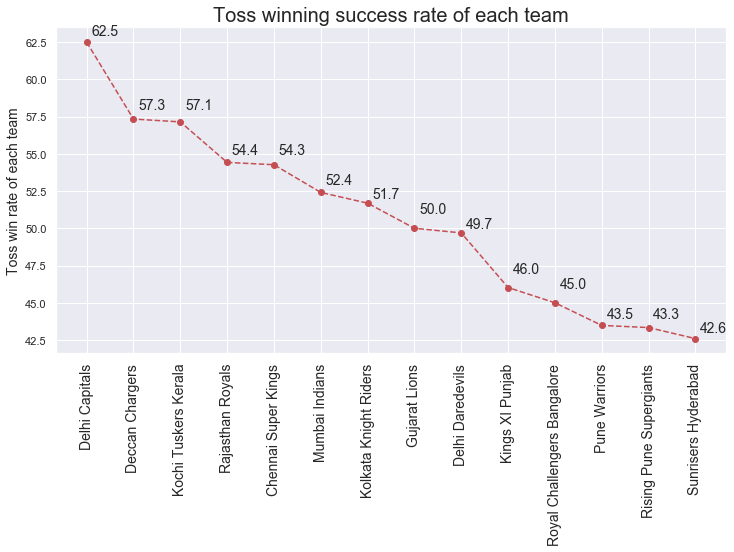

In [48]:
#Toss winning success rate
toss_won = new_df['toss_winner'].value_counts()
toss_win_rate = (toss_won/matches_played)*100
data = toss_win_rate.sort_values(ascending = False)
plt.figure(figsize=(12,6))
plt.plot(data.index,data,'r--o')
plt.ylabel('Toss win rate of each team',fontsize=14)
plt.xticks(rotation=90,fontsize=14)
count=0
for i in data:
    plt.text(count+0.1,int(i)+1,str(round(i,1)),rotation=0,fontsize=14)
    count+=1
plt.title('Toss winning success rate of each team',fontsize=20)
plt.show()
#Delhi Capitals has nore chances of winning the toss followed by Deccan Chargers.

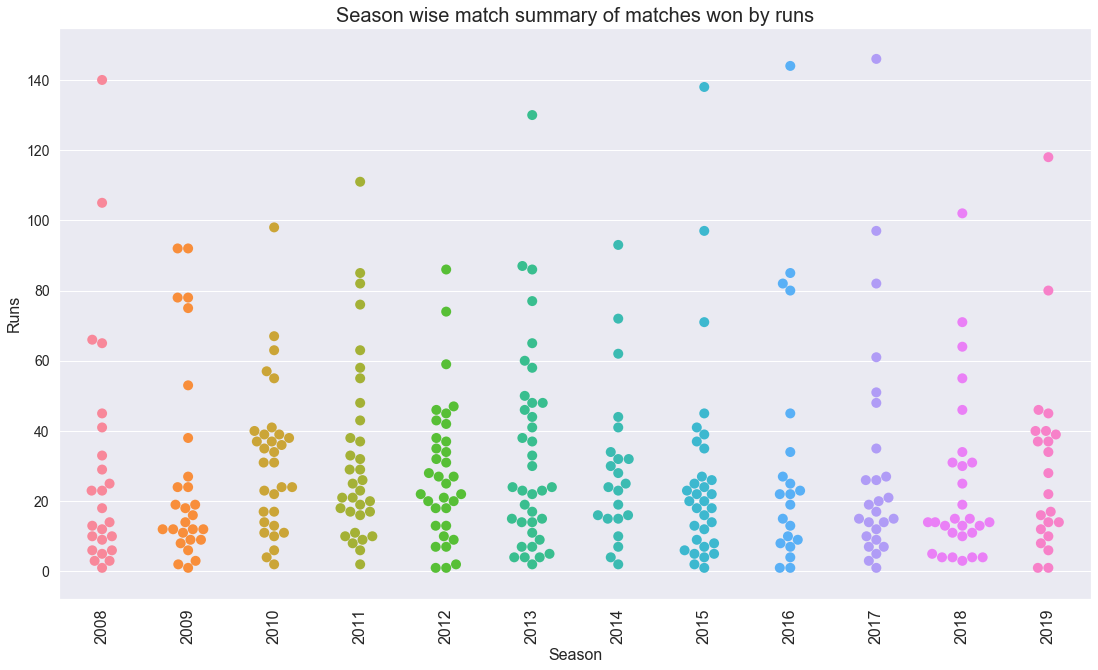

In [49]:
#Season wise match summary of matches won by runs
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
sns.swarmplot(new_df['season'],new_df[new_df['win_by_runs']!=0]['win_by_runs'],s=10)
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=14)
plt.xlabel('Season',fontsize=16)
plt.ylabel('Runs',fontsize=16)
plt.title('Season wise match summary of matches won by runs',fontsize=20)
plt.show()

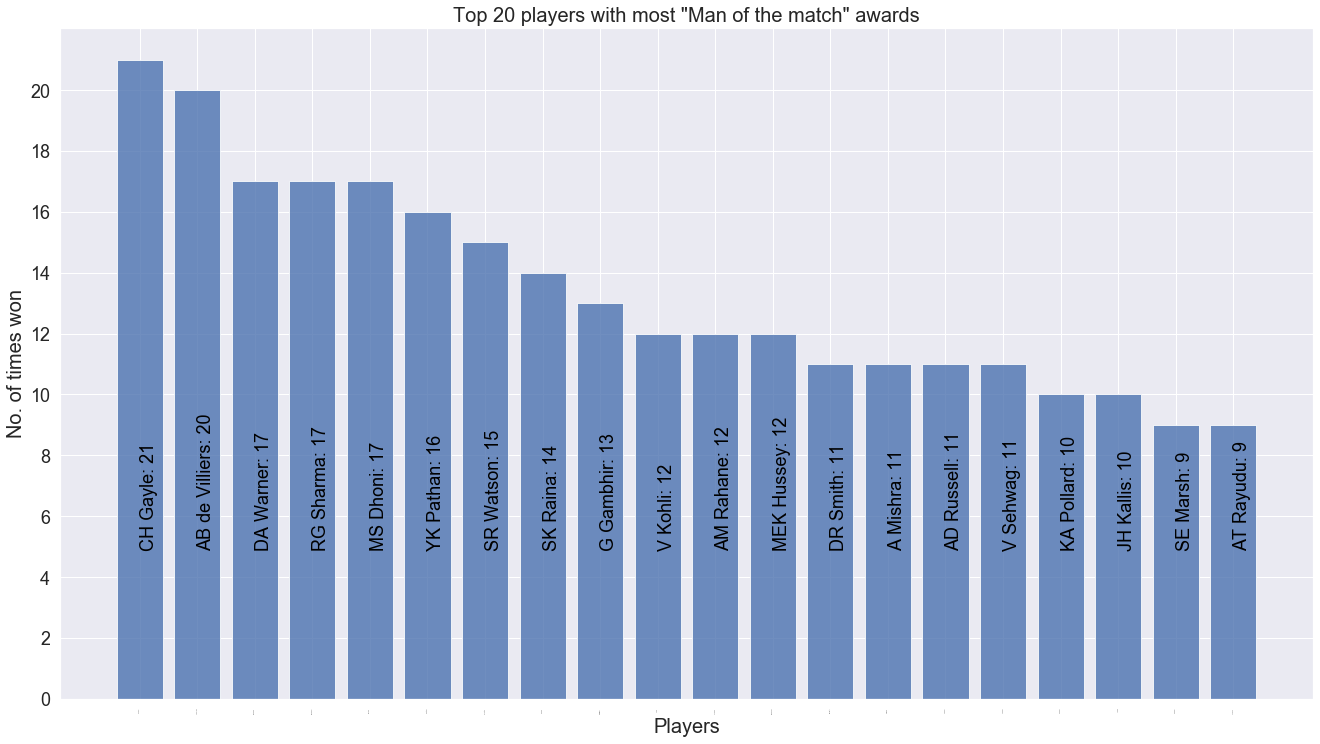

In [50]:
#top 10 performing player
players=pd.DataFrame(new_df['player_of_match'].value_counts())
players['name']=players.index
players=players.head(20)
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.xticks(rotation=90,fontsize=0)
plt.yticks([0,2,4,6,8,10,12,14,16,18,20],[0,2,4,6,8,10,12,14,16,18,20],fontsize=18)
plt.bar(players['name'], players['player_of_match'],alpha=0.8)
count=0
for i in players['player_of_match']:
    plt.text(count,5,players['name'][count]+': '+str(i),rotation=90,color='black',size=18)
    count+=1
plt.title('Top 20 players with most "Man of the match" awards',fontsize=20)
plt.xlabel('Players',fontsize=20)
plt.ylabel('No. of times won',fontsize=20)
plt.tight_layout()
plt.show()
#Chris Gayle has most title of man of the matches

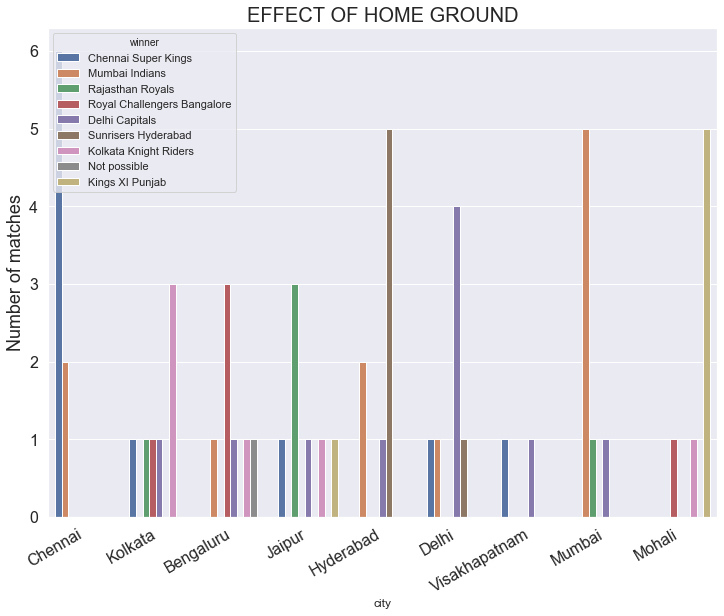

In [51]:
#effect of home ground
plt.figure(figsize = (12,9))
venue = new_df[['city','winner','season']]
venue_season = venue[venue['season'] == 2019]
ax = sns.countplot('city', data = venue_season, hue = 'winner' )
plt.xticks(rotation=30, ha = 'right',fontsize=16)
plt.ylabel('Number of matches',fontsize=18)
plt.title("EFFECT OF HOME GROUND",fontsize=20)
plt.yticks(fontsize=16)
plt.show()
#Team has won most number of matches on their home ground in 2019. 

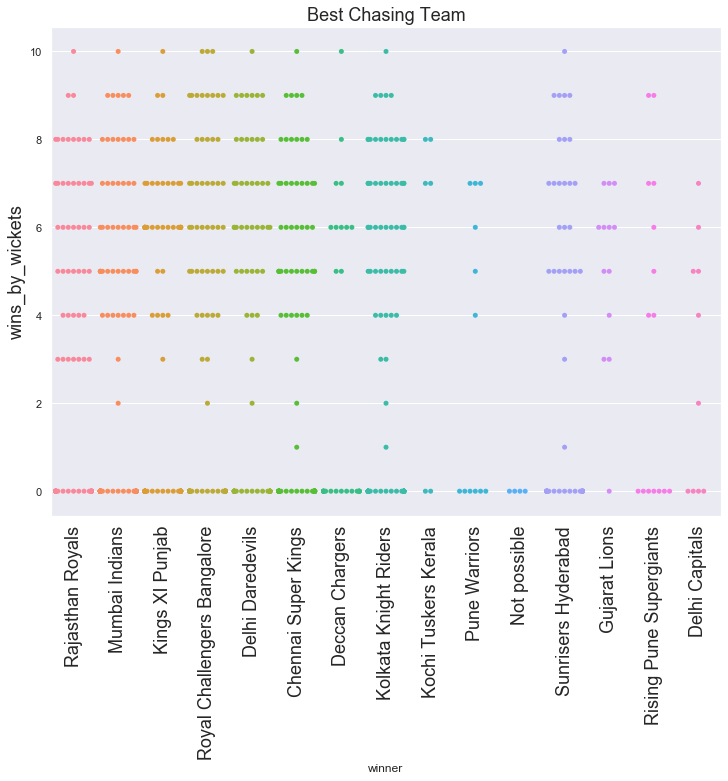

In [52]:
#best chasing team
sns.set(style='darkgrid')
plt.figure(figsize=(12,9))
sns.swarmplot(y='win_by_wickets',x='winner',data=new_df)
plt.xticks(rotation=90,fontsize=18)
plt.title('Best Chasing Team',fontsize=18)
plt.ylabel("wins_by_wickets",fontsize=18)
plt.show()
#Royal Challangers Bangalore, Mumbai Indians and Kolkata Knight Riders are the best Chasing teams.

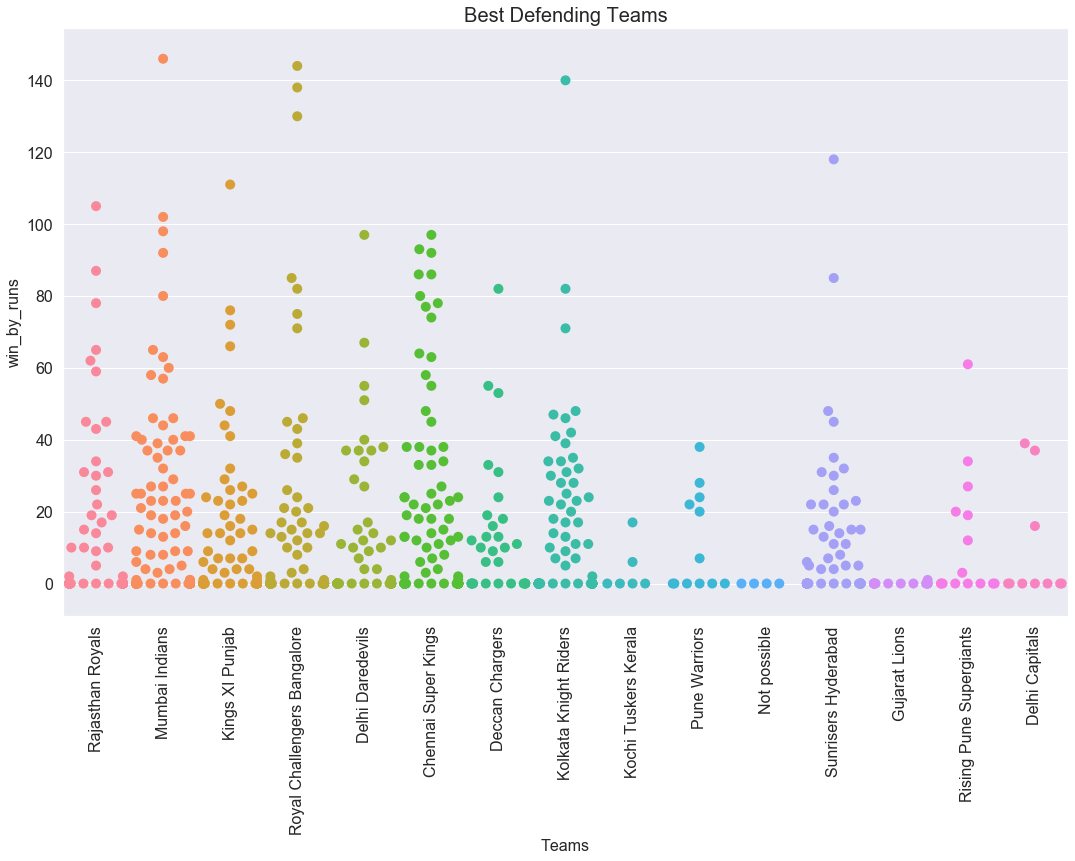

In [53]:
plt.figure(figsize=(15,9))
sns.swarmplot(y='win_by_runs',x='winner',data=new_df,s=10)
plt.tight_layout()
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=16)
plt.title('Best Defending Teams',fontsize=20)
plt.ylabel("win_by_runs",fontsize=16)
plt.xlabel("Teams",fontsize=16)
plt.show()
#Mumbai Indians, Royal Challangers Bangalore, Chennai Super kings and Sunrisers Hyderabad are best Defending teams.

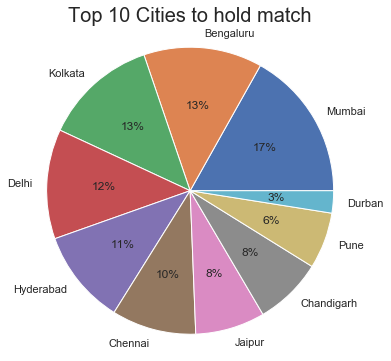

In [54]:
#TOP 10 cities to hold match
plt.figure(figsize=(10,6))
ax=new_df['city'].value_counts()[:10]
plt.title('Top 10 Cities to hold match',fontsize=20)
plt.pie(ax,labels=ax.index, autopct='%1.0f%%',radius=1.1)
plt.show()
#Mumbai had hold highest number of matches (101) followed by Kolkata (80).

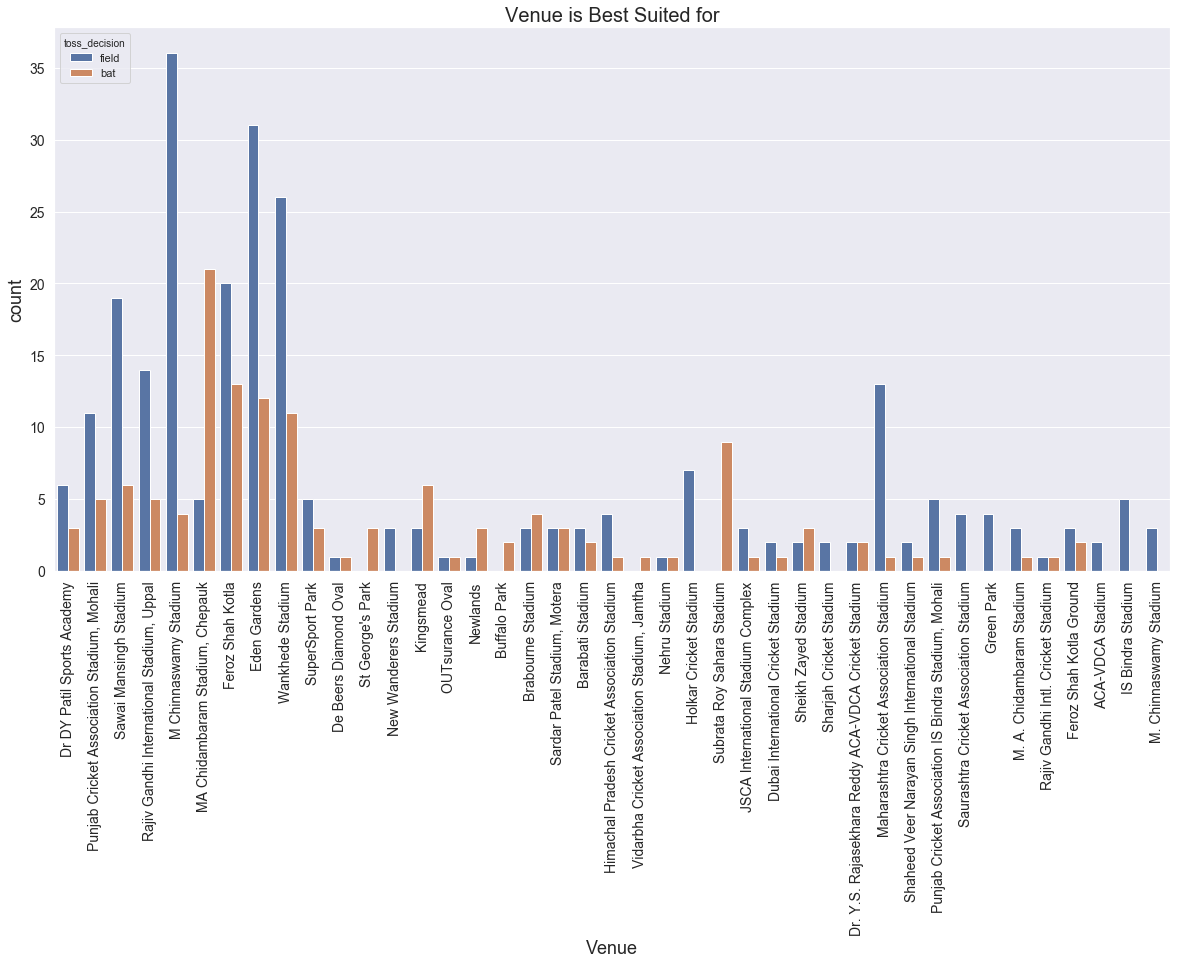

In [55]:
#4.25 Identify if each Venue is Best Suited to opt for batting or fielding based on previous matches won on that venue
plt.figure(figsize=(20,10))
venue_suit_for=new_df[new_df['toss_winner'] == new_df['winner']]
sns.countplot(x='venue',hue='toss_decision',data=venue_suit_for)
plt.xlabel('Venue',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.title('Venue is Best Suited for',fontsize=20)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
plt.show()
#M Chinnaswamy stadium and Eden Gardens is best Suited for Feilding and MA Chidambaram Stadium ,Chepauk is best suited for Batting.

In [56]:
#In which city does each team has won more matches?
a=new_df.groupby(['winner','city']).size().reset_index(name='win_counts')
a=a.sort_values("win_counts",ascending=False)
a.groupby("winner").head(1)
#Teams had won more matches in their home grounds.

,winner,city,win_counts
136,Mumbai Indians,Mumbai,53
117,Kolkata Knight Riders,Kolkata,45
4,Chennai Super Kings,Chennai,40
175,Royal Challengers Bangalore,Bengaluru,37
160,Rajasthan Royals,Jaipur,32
201,Sunrisers Hyderabad,Hyderabad,30
50,Delhi Daredevils,Delhi,27
81,Kings XI Punjab,Chandigarh,22
172,Rising Pune Supergiants,Pune,5
37,Delhi Capitals,Delhi,4


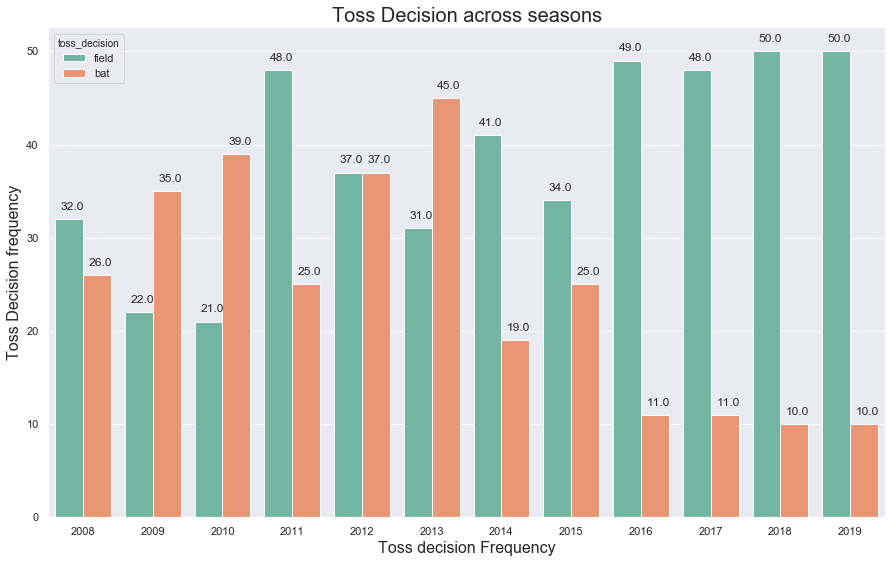

In [57]:
#4.18 Toss Decision across seasons
plt.figure(figsize=(15,9))
ax =sns.countplot(x='season',hue='toss_decision',data=new_df,palette="Set2")
plt.ylabel('Toss Decision frequency',fontsize=16)
plt.xlabel("Toss decision Frequency",fontsize=16)
plt.title('Toss Decision across seasons',fontsize=20)
annot_plot(ax,0.08,1)
plt.show()
#From the year 2014 most of the teams are opting to field after winning toss.

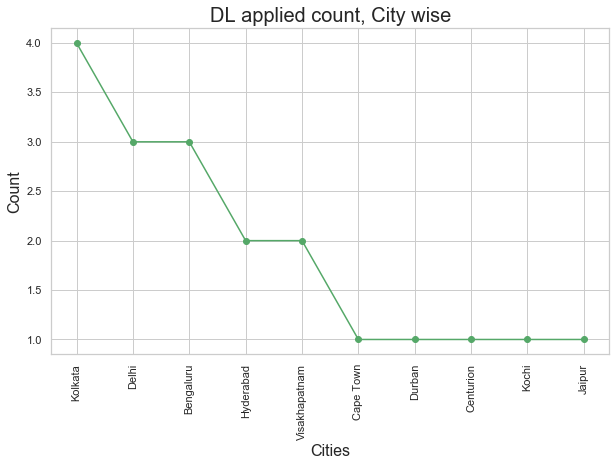

In [58]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
ax=new_df.city[new_df.dl_applied==1].value_counts()
plt.ylabel("Count",fontsize=16)
plt.title("DL applied count, City wise",fontsize=20)
plt.xlabel("Cities",fontsize=16)
plt.xticks(rotation=90)
plt.plot(ax,'g-o')
plt.show()
#Kolkata, Bangalore and Delhi is more likely to have bad weather.

In [59]:
#4.20 How toss winning affects the match winner
tosswin_win = new_df['id'][new_df['toss_winner'] == new_df['winner']].count()
total_matches=new_df['id'].count()
Success_rate = ((new_df[new_df['toss_winner'] == new_df['winner']].count())/(total_matches))*100

print("Number of matches in which Toss winner is the game winner is :",tosswin_win, "out of",total_matches," ie.,", Success_rate["id"],"%" )

Number of matches in which Toss winner is the game winner is : 393 out of 756  ie., 51.98412698412699 %


Proportion of CIs covering Pop mean 0.96


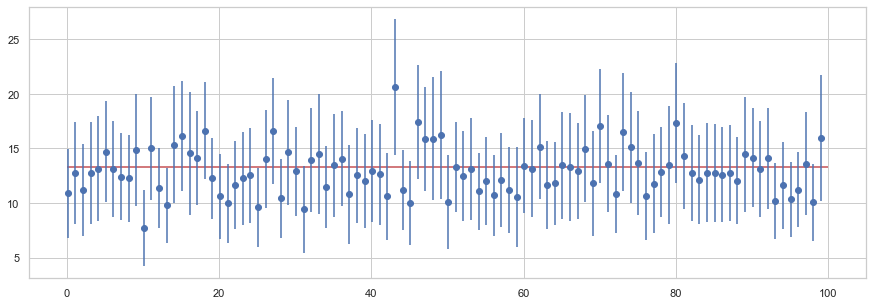

In [60]:
#confidence interval
%matplotlib inline
from math import sqrt
from scipy.stats import norm
pop_mean = np.mean(new_df.win_by_runs)

def sampling(sample_size, no_of_samples):
    sample_means = []
    intervals = []
    count = 0
    for i in range(no_of_samples):
        sample = new_df.win_by_runs.sample(sample_size)
        sample_means.append(np.mean(sample))
        ci = norm.interval(0.95, np.mean(sample),
                            np.std(sample, ddof =1)/sqrt(sample_size))
        intervals.append(ci)
        if pop_mean >= ci[0] and pop_mean <= ci[1]:
            count = count + 1
    print('Proportion of CIs covering Pop mean', count/no_of_samples)
    plt.figure(figsize=(15,5))
    plt.hlines(y = pop_mean, xmin = 0, xmax = 100, color ='r')
    plt.errorbar(np.arange(0.1, 100, 1), sample_means, fmt = 'o', yerr = [(upp - low)/2 for low, upp in intervals])
    plt.show()
   
sampling(100, 100)

In [61]:
#Correlation
new_df.corr(method ='pearson')

,id,season,dl_applied,win_by_runs,win_by_wickets
id,1.000000,0.668304,-0.011658,-0.039403,-0.012239
season,0.668304,1.000000,-0.001116,-0.037529,-0.009379
dl_applied,-0.011658,-0.001116,1.000000,-0.016349,-0.011631
win_by_runs,-0.039403,-0.037529,-0.016349,1.000000,-0.560420
win_by_wickets,-0.012239,-0.009379,-0.011631,-0.560420,1.000000


In [62]:
def correlationCoefficient(X, Y, n) : 
    sum_X = 0
    sum_Y = 0
    sum_XY = 0
    squareSum_X = 0
    squareSum_Y = 0
         
    i = 0
    sum_X = sum(X) 
    sum_Y = sum(Y) 
    while i < n :   
        # sum of X[i] * Y[i]. 
        sum_XY = sum_XY + X[i] * Y[i] 
          
        # sum of square of array elements. 
        squareSum_X = squareSum_X + X[i] * X[i] 
        squareSum_Y = squareSum_Y + Y[i] * Y[i] 
        i = i + 1
       
    # use formula for calculating correlation  
    # coefficient. 
    corr = (float)(n * sum_XY - sum_X * sum_Y)/(float)(math.sqrt((n * squareSum_X - sum_X * sum_X)* (n * squareSum_Y - sum_Y * sum_Y))) 
    return corr 
      
# Driver function 
X =  list(new_df.win_by_runs)
Y =  list(new_df.win_by_wickets)
       
# Find the size of array. 
n = len(new_df.win_by_runs) 
  
# Function call to correlationCoefficient. 
print ('The value of correlation coefficient is: {0:.6f}'.format(correlationCoefficient(X, Y, n))) 

The value of correlation coefficient is: -0.560420


In [63]:
#Finding Beta1
X =  list(new_df.win_by_runs)
Y =  list(new_df.win_by_wickets)

squareSum_X=0
sum_XY=0
i=0

n = len(new_df.win_by_runs)
mean_X = sum(X)/n 
mean_Y = sum(Y)/n    

# sum of X[i] * Y[i].
while(i<n):
    squareSum_X = squareSum_X + X[i] * X[i] 
    sum_XY = sum_XY + X[i] * Y[i] 
    i+=1

Beta1 = (sum_XY - (n*mean_X*mean_Y))/(squareSum_X - (n*mean_X))
print("The value of Beta1 is:",Beta1)

The value of Beta1 is: -0.06239154494858481


In [64]:
Beta0= mean_Y-(Beta1*mean_X)
print("The value of Beta0 is:",Beta0)

The value of Beta0 is: 4.17928028356308


In [65]:
#Hypothesis: Mumbai Indians and Chennai Super Kings likely to win more matches.
"""
On studying graph Number of matches won by each team at each season, Success Rate of each team and Which team won 
#maximum season we observed that Mumbai Indians and Chenni Super Kings are the teams who are more likely to win th IPL Season.
"""

'\nOn studying graph Number of matches won by each team at each season, Success Rate of each team and Which team won \n#maximum season we observed that Mumbai Indians and Chenni Super Kings are the teams who are more likely to win th IPL Season.\n'

1      3
2      6
3     18
4     41
5     71
6     85
7     80
8     54
9     37
10    11
Name: win_by_wickets, dtype: int64


Text(0, 0.5, 'Frequency')

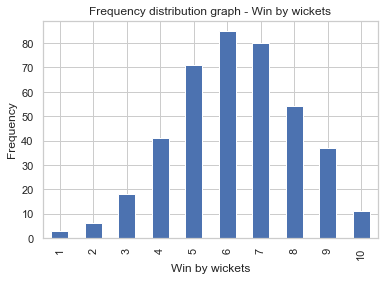

In [66]:
win_by_wickets = new_df[new_df.win_by_wickets > 0].win_by_wickets
win_by_wickets_freq = win_by_wickets.value_counts(sort=False)
print(win_by_wickets_freq)
plot = win_by_wickets_freq.plot.bar()
plot.set_title("Frequency distribution graph - Win by wickets")
plot.set_xlabel("Win by wickets")
plot.set_ylabel("Frequency")

In [67]:
# z-value for the win_by_run==35
win_by_runs_data = new_df[new_df.win_by_runs > 0].win_by_runs
win_by_runs_mean = win_by_runs_data.mean()
win_by_runs_std = win_by_runs_data.std()
z_score_35 = (35 - win_by_runs_mean) / win_by_runs_std
print(f'Z-score of 35 is {z_score_35:.2f}')

Z-score of 35 is 0.19


In [68]:
#percentile from z-score
z_score = stats.norm.cdf(0.19)
print(f'z-score of 0.19 = {z_score * 100:.2f} percentile')

z-score of 0.19 = 57.53 percentile


In [69]:
#CONCLUSION
"""This dataset contains data about IPL matches from season 2008 to 2019:-
1)Totally 13 teams has participated in IPL History and few teams like: Pune Warriors, Kochi Tuskers Kerala Rising Pune
Supergiants, Gujarat Lions  and Delhi Capitals has been only in 2 seasons but the success rate of Delhi Capitals is good 
comparatively among the new teams.
2)Mumbai Indians, Royal Challangers Bangalore and Chennai Super kings are best Defending teams
3)Royal Challangers Bangalore, Mumbai Indians and Kolkata Knight Riders are the best Chasing teams.
4)From the year 2014 most of the teams are opting to field after winning toss and are also successful in winning the match.
5)Overall Chennai Super Kings and Mumbai Indians have high success rate and these two teams are the most successful teams
in the tournament as MI has won 4 seasons and CSK has won 3 seasons.
6)From the analysis, it was concluded that Chennai Super Kings and Mumbai Indians are more likely to win upcoming IPL seasons.
7)Kolkata, Bangalore and Delhi is more likely to have bad weather during the ipl season.
8)Teams have won more matches in their home grounds.
9)M Chinnaswamy stadium and Eden Gardens is best Suited for Feilding and MA Chidambaram Stadium,Chepauk is best 
suited for Batting.
10)At Mumbai highest number of matches has been played.
11)Chris Gayle has most title for man of the matches i.e 21.
12)Percentage where Toss winner is the game winner is 51.98%. 
13)Delhi Capitals has more chances of winning the toss followed by Deccan Chargers but Delhi Capitals has played only two seasons.
14)There is no linear relation between win_by_runs and win_by_wicket as correlation coefficient is negative.
"""

'This dataset contains data about IPL matches from season 2008 to 2019:-\n1)Totally 13 teams has participated in IPL History and few teams like: Pune Warriors, Kochi Tuskers Kerala Rising Pune\nSupergiants, Gujarat Lions  and Delhi Capitals has been only in 2 seasons but the success rate of Delhi Capitals is good \ncomparatively among the new teams.\n2)Mumbai Indians, Royal Challangers Bangalore and Chennai Super kings are best Defending teams\n3)Royal Challangers Bangalore, Mumbai Indians and Kolkata Knight Riders are the best Chasing teams.\n4)From the year 2014 most of the teams are opting to field after winning toss and are also successful in winning the match.\n5)Overall Chennai Super Kings and Mumbai Indians have high success rate and these two teams are the most successful teams\nin the tournament as MI has won 4 seasons and CSK has won 3 seasons.\n6)From the analysis, it was concluded that Chennai Super Kings and Mumbai Indians are more likely to win upcoming IPL seasons.\n7)Ko